# Data exploration

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load dataset

In [2]:
dataset_path = "dataset"
train_data_fb = "training.1600000.processed.noemoticon.csv"
df=pd.read_csv(dataset_path + "/" + train_data_fb, encoding="latin_1",  names=['target', 'ids', 'date', 'flag', 'user', 'text'])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Data quality

### General

In [3]:
print(f"Dataframe shape: {df.shape}")
print(f"Columns: {df.columns}")

Dataframe shape: (1600000, 6)
Columns: Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df['flag'].value_counts()

flag
NO_QUERY    1600000
Name: count, dtype: int64

Flag column does not contain any useful information. Let's drop this feature.

In [6]:
df = df.drop("flag", axis = 1)

Checking the labels. Convert them to binary.

In [7]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [8]:
df["target"] = df["target"].apply(lambda x: 0 if x == 0 else 1)

In [9]:
df

,target,ids,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Empty tweet

In [10]:
empty_tweets = df[df['text'].apply(lambda x: len(x)==0)]
print(f"Number of empty tweets: {len(empty_tweets.index)}")

Number of empty tweets: 0


### Senstive data

In [11]:
import re
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
pii_users = df['text'].apply(lambda x: re.findall(userPattern, x)).apply(lambda x: ' '.join(x)).values
pii_users = [u for u in pii_users if u]



from collections import Counter
labels, values = Counter(pii_users).items()

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

### Duplicated

Ensure there is no duplicated row

In [12]:
assert not any(df.duplicated())

Check duplicated in text content

In [13]:
duplicated_text = df[df['text'].duplicated(keep=False)]['text'].sort_values()
df.iloc[duplicated_text.index]

,target,ids,date,user,text
271472,0,1990023076,Mon Jun 01 03:37:19 PDT 2009,Jana1503,David must be hospitalized for five days end...
271505,0,1990029536,Mon Jun 01 03:38:42 PDT 2009,Jana1503,David must be hospitalized for five days end...
1132076,1,1975956610,Sat May 30 16:16:11 PDT 2009,DavidStocum,bathroom is clean..... now on to more enjoya...
1132074,1,1975956536,Sat May 30 16:16:11 PDT 2009,dstocum,bathroom is clean..... now on to more enjoya...
540159,0,2199656747,Tue Jun 16 17:49:00 PDT 2009,cutthroatpixie,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
...,...,...,...,...,...
458170,0,2071810977,Sun Jun 07 19:57:37 PDT 2009,nancymack4,"zofran is not making this work day any easier,..."
464810,0,2175206707,Mon Jun 15 00:21:43 PDT 2009,Yukkaogebb,~ get SUICIDE !!
463926,0,2175018052,Sun Jun 14 23:52:55 PDT 2009,Yukkaogebb,~ get SUICIDE !!
1170868,1,1980423297,Sun May 31 06:42:03 PDT 2009,Tweetiebaby,~~~X0X0~~~!!!X0X0!!! I love you!!! &amp;...


We notice duplicated tweets. We also see inconsistency in labels such as index 1170868 and 238478. Let's first drop all row that contains the same text and a different target.

In [14]:
inconsistency = df.groupby(df['text'], as_index=False)['target'].mean()
inconsistency_filter = inconsistency['target'].apply(lambda x: x not in [0,1])
inconsistency_tweets_unique = inconsistency[inconsistency_filter]['text']
print(f"Number of unique inconsistent tweets: {inconsistency_tweets_unique.count()}")

Number of unique inconsistent tweets: 2225


In [15]:
inconsistency_tweets = df[df.apply(lambda x: x['text'] in inconsistency_tweets_unique.values, axis=1)]
print(inconsistency_tweets.sort_values(by="text").head(n=10).to_string())
print(f"Total number of inconsistent tweets: {len(inconsistency_tweets.index)}")

         target         ids                          date            user                                                                                                                                      text
385331        0  2053581479  Sat Jun 06 05:02:55 PDT 2009      FunStarLiz                                                         British weather is back i see! Oh well Birtney, london and ciaraaaa in 5 dayssss 
1394129       1  2053581479  Sat Jun 06 05:02:55 PDT 2009      FunStarLiz                                                         British weather is back i see! Oh well Birtney, london and ciaraaaa in 5 dayssss 
1272390       1  2000686472  Mon Jun 01 22:42:09 PDT 2009     thatLenakid                                                                                                                                I love you
507399        0  2188890860  Mon Jun 15 22:46:53 PDT 2009           Aryy1                                                                               

We finally drop the inconsistent tweets

In [16]:
df = df.drop(inconsistency_tweets.index)

Then we drop duplicated text

In [17]:
df = df.drop_duplicates("text")

Let's check the label repartition

In [18]:
df["target"].value_counts()

target
1    791281
0    787960
Name: count, dtype: int64

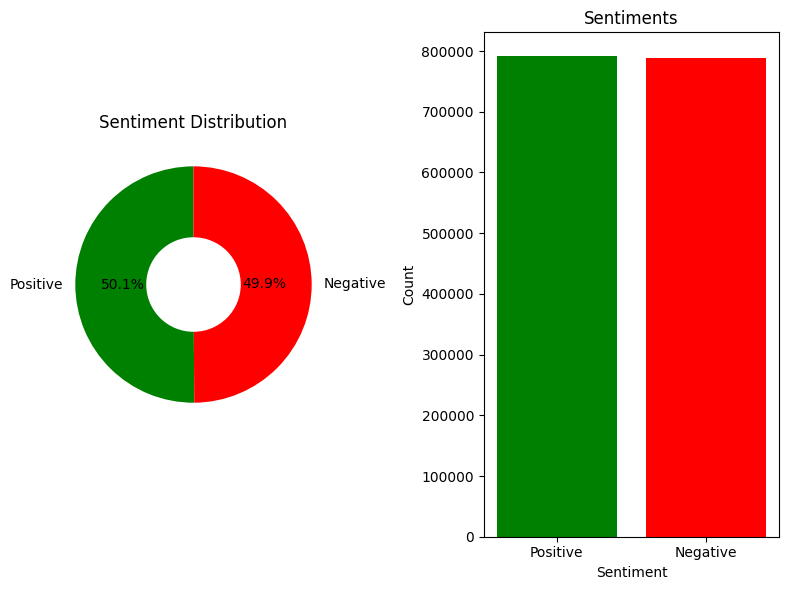

In [19]:
df_target = (
    df['target'].value_counts().to_frame(name='count').reset_index()
    .rename(columns={'index': 'target'})
)

# Convert 'target' to numeric (1 for positive, 0 for negative)
df_target['target'] = df_target['target'].replace(4, 1)

# Calculate user counts for positive and negative tweets
positive_tweets = df_target[df_target['target'] == 1]['count'].sum()
negative_tweets = df_target[df_target['target'] == 0]['count'].sum()

#sunplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Pie Chart for Sentiment Distribution
ax1.pie(
    [positive_tweets, negative_tweets],
    labels=['Positive', 'Negative'],
    autopct="%1.1f%%",
    startangle=90,
    colors=['green', 'red'],
    wedgeprops=dict(width=0.6)
)
ax1.set_title('Sentiment Distribution')

# Bar Chart for User Counts
ax2.bar(['Positive', 'Negative'], [positive_tweets, negative_tweets], color=['green', 'red'])
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_title('Sentiments')

# Tight layout for better overall plot arrangement
plt.tight_layout()

# Display the combined plot
plt.show()


The label are well distributed enough.

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

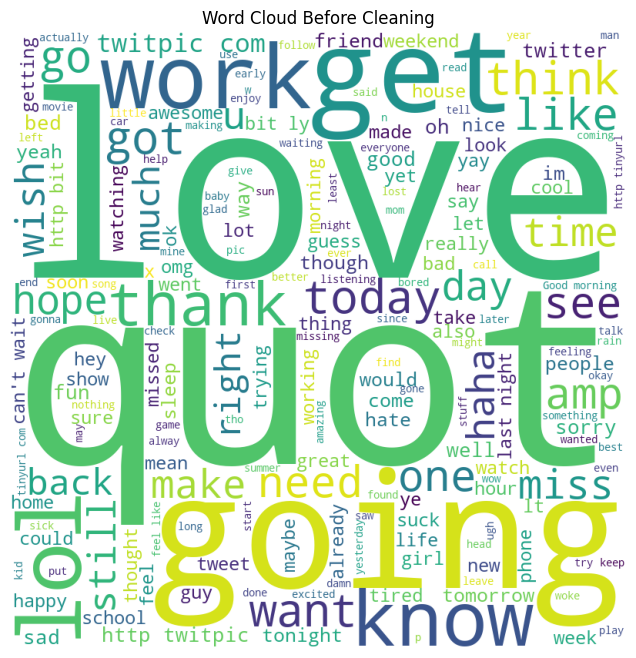

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=800, 
                          background_color='white', 
                          stopwords=stop_words, 
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title)
    plt.show()
    
raw_drity_text = ' '.join(df['text'])
generate_word_cloud(raw_drity_text, 'Word Cloud Before Cleaning')


In [22]:
import string
from collections import Counter

raw_drity_text_counter = Counter(raw_drity_text)
non_letters_characters = raw_drity_text_counter.keys() - list(string.ascii_letters)
print(non_letters_characters)
print(f"Size of non_letters_characters {len(non_letters_characters)}")

{'\x83', '\x92', '\x91', '\x86', '³', '\x7f', '»', ']', 'à', '¢', '°', '©', '%', '@', '2', '¥', '?', '¯', '\x88', 'Ú', ' ', '±', '\t', 'è', 'Å', 'â', 'º', '6', 'Ê', 'æ', 'Î', '\x9e', 'Í', 'é', '\x85', 'Ì', '[', '¨', 'ï', '|', '¦', 'ß', 'ê', 'í', '+', 'Ó', '4', '9', '\x8b', 'Ð', 'µ', 'ã', 'Ç', 'Æ', ';', '/', '#', '×', 'î', '¼', ',', '¸', '5', '\x8e', 'ì', '\x8c', 'Ë', 'Ò', '¬', '\x93', '\x9b', '¾', '\x95', 'Ä', '´', '_', 'Â', 'å', '\x87', 'Ø', 'Ñ', '·', '£', '\x98', '\x84', '§', '\\', '\x9a', 'á', '²', '{', 'È', '\x96', 'ë', 'Ù', 'Ã', ')', '\x99', 'É', 'ç', 'Û', '8', '7', '\x9f', '$', '\x97', '~', '\x9c', '\x94', '}', '!', '-', '=', '^', '&', '½', '¤', "'", '¹', '¶', '\x89', '(', '1', 'Ï', '.', '3', '`', '\x80', '\xad', '\x8a', '¡', '¿', ':', '\xa0', 'ª', 'ä', '0', '*', '\x82', '«', '®'}
Size of non_letters_characters 141


There are plenty of special characters. We need to clean them

In [23]:
# Function to plot bar plot of word frequencies
def plot_word_frequencies(text, title):
    word_freq = nltk.FreqDist(text.split())
    common_words = word_freq.most_common(20)
    words, freqs = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
# Step 3: Plot bar plots of word frequencies


/tmp/ipykernel_1160/2346538814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


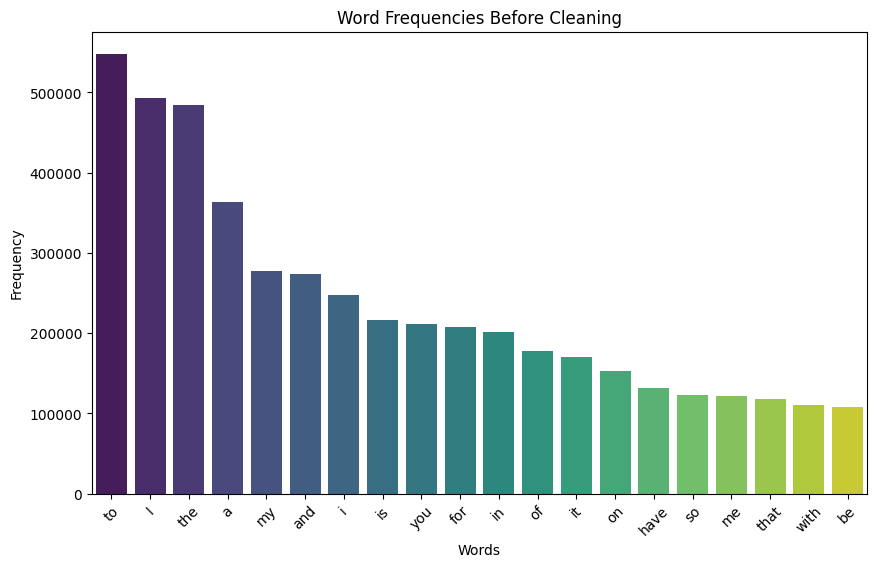

In [24]:
plot_word_frequencies(' '.join(df['text']), 'Word Frequencies Before Cleaning')

There are words without much meaning. We need to clean them 

## Cleaning

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /opt/app-
[nltk_data]     root/src/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

# Defining regex patterns.
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

In [27]:
import re
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
    #tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)
    #tweet = re.sub(r"https?://\S+", "", tweet) 
    #tweet = re.sub(r"@\w+|#", "", tweet)


def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = ' '.join([w for w in tweet.split(" ") if len(w) > 2])
    tweet = re.sub(urlPattern,'URL ',tweet)
    for emoji in emojis.keys():
        tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
    tweet = re.sub(userPattern, 'USER ', tweet)
    tweet = re.sub(alphaPattern, " ", tweet)
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    tweet = " ".join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])
    return tweet

df['text'] = df["text"].apply(clean_tweet)

In [28]:
df['text']

0          USER URL aww bummer shoulda got david carr thi...
1          upset update facebook texting might cry result...
2          USER dived many time ball managed save rest bound
3                            whole body feel itchy like fire
4                                      USER behaving mad see
                                 ...                        
1599995                        woke school best feeling ever
1599996          thewdb com cool hear old walt interview URL
1599997                       ready mojo makeover ask detail
1599998        happy th birthday boo time tupac amaru shakur
1599999                  happy charitytuesday USER USER USER
Name: text, Length: 1579241, dtype: object

Check for empty tweets after the cleaning process

In [29]:
empty_tweets = df[df['text'].apply(lambda x: len(x)==0)]
print(f"Number of empty tweets: {len(empty_tweets.index)}")

Number of empty tweets: 575


In [30]:
df = df.drop(empty_tweets.index)

In [31]:
print(f"Number of empty tweets: {len(df[df['text'].apply(lambda x: len(x)==0)].index)}")

Number of empty tweets: 0


/tmp/ipykernel_1160/2346538814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


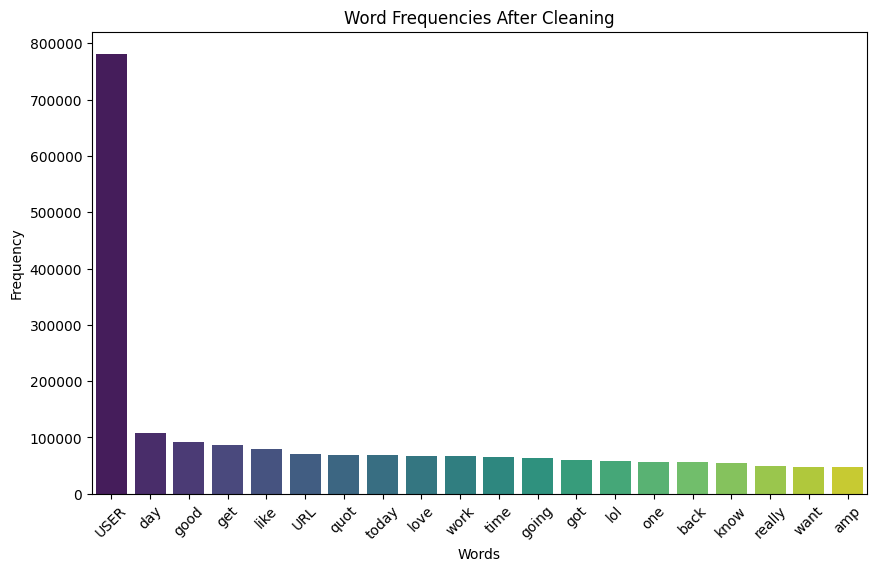

In [32]:
plot_word_frequencies(' '.join(df['text']), 'Word Frequencies After Cleaning')

/tmp/ipykernel_1160/2346538814.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


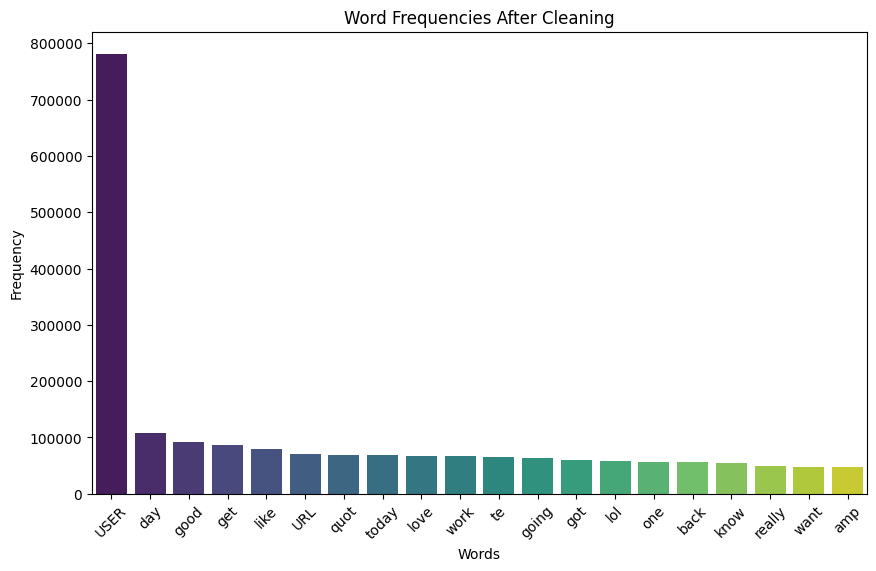

In [33]:
test = ' '.join([w.replace("im", "") for w in df['text']])
plot_word_frequencies(test, 'Word Frequencies After Cleaning')

In [34]:
df['text'] = df['text'].apply(lambda x: x.replace("im", ""))

In [35]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = " ".join(df[df["target"] == 1]["text"])
negative_words = " ".join(df[df["target"] == 0]["text"])

wordcloud_postitive = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate(negative_words)



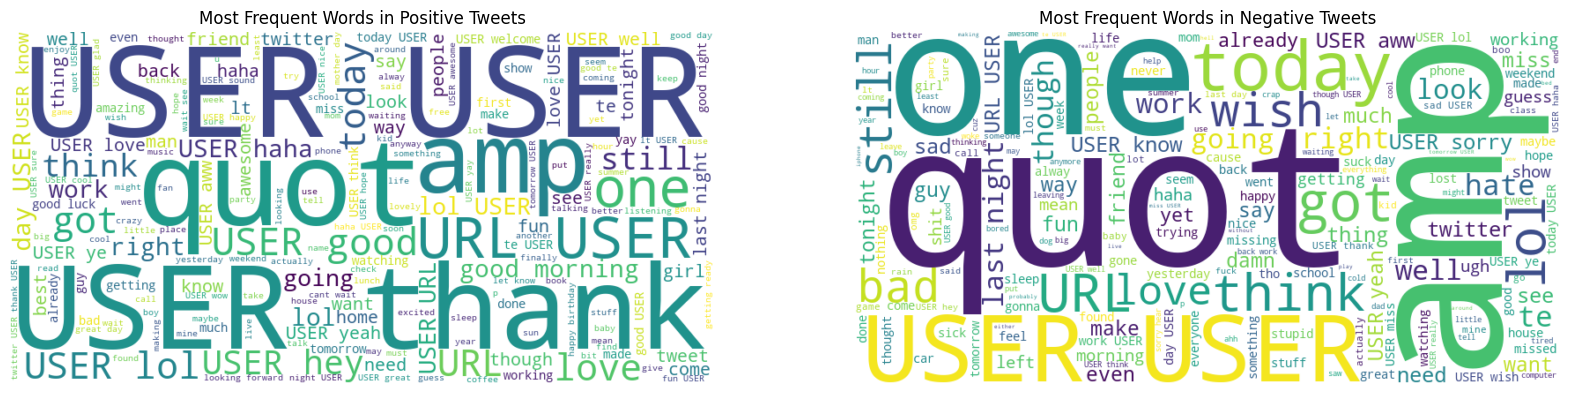

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(20, 30))
axes[0].imshow(wordcloud_postitive, interpolation="bilinear")
axes[0].set_title("Most Frequent Words in Positive Tweets")
axes[0].axis("off")
axes[1].imshow(wordcloud_negative, interpolation="bilinear")
axes[1].set_title("Most Frequent Words in Negative Tweets")
axes[1].axis("off")
plt.show()

In [37]:
df["tweet_length"] = df["text"].apply(lambda x: len(x.split()))
tweet_len = df.groupby(["target"]).agg(
   mean = ("tweet_length", "mean")
)
tweet_len = tweet_len.transpose()
tweet_len


target,0,1
mean,7.338687,7.250399


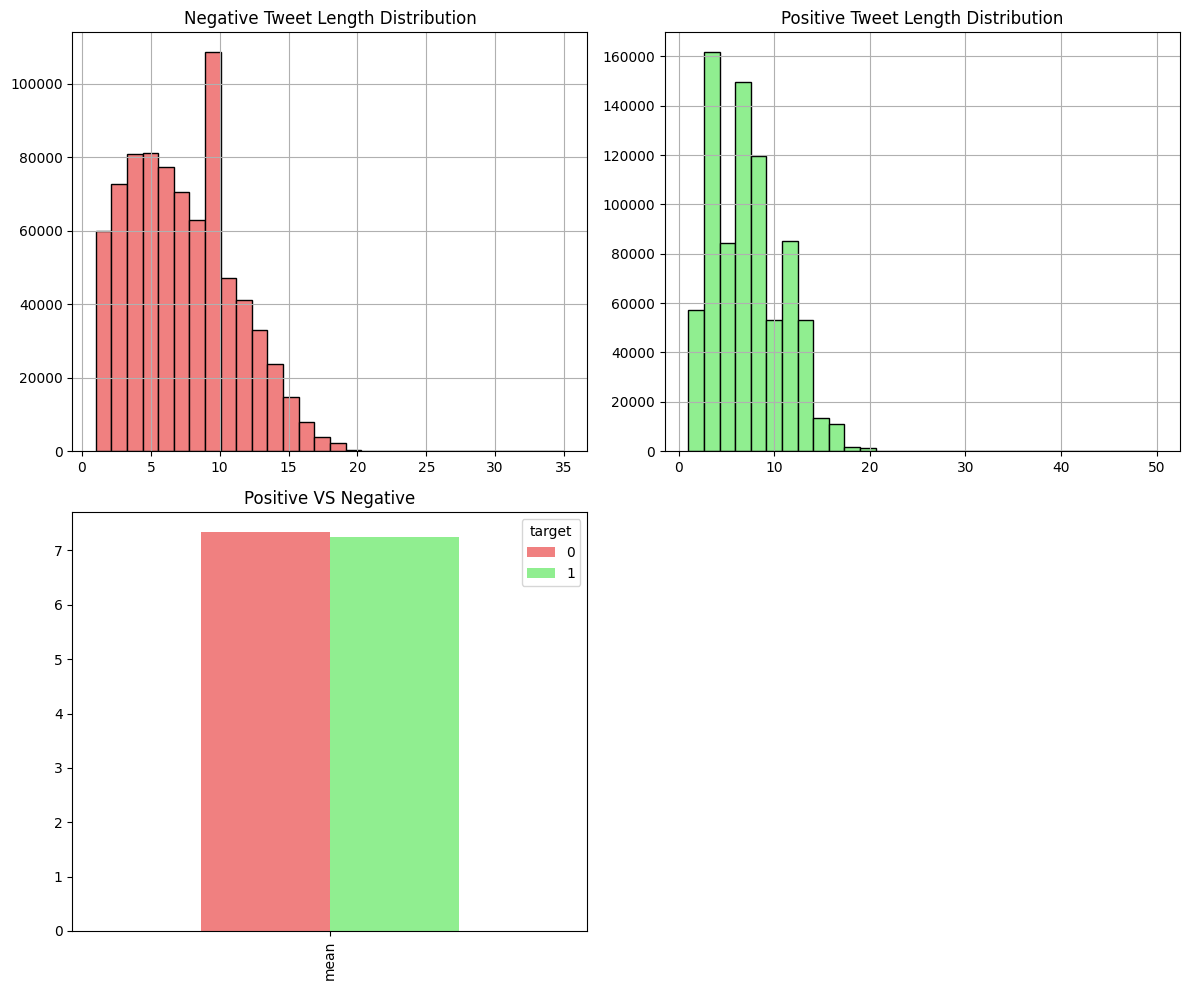

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))


df[df["target"]==0]["tweet_length"].hist(color="lightcoral", edgecolor="black", ax=axes[0, 0], bins=30)
df[df["target"]==1]["tweet_length"].hist(color="lightgreen", edgecolor="black", ax=axes[0, 1], bins=30)
tweet_len.plot(kind="bar", color = ("lightcoral", "lightgreen"), ax = axes[1, 0] )

axes[0, 0].set_title("Negative Tweet Length Distribution")
axes[0, 1].set_title("Positive Tweet Length Distribution")
axes[1, 0].set_title("Positive VS Negative")
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()



In [39]:
df[df['tweet_length'] == 11]

,target,ids,date,user,text,tweet_length
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,upset update facebook texting might cry result...,11
39,0,1467818007,Mon Apr 06 22:21:39 PDT 2009,Anthony_Nguyen,bed class work gym class another day gonna fly...,11
44,0,1467819022,Mon Apr 06 22:21:56 PDT 2009,hpfangirl94,falling asleep heard tracy girl body found sad...,11
59,0,1467822522,Mon Apr 06 22:22:49 PDT 2009,Jenn_L,move thought already sd hmm random found glad ...,11
65,0,1467824199,Mon Apr 06 22:23:15 PDT 2009,adri_mane,USER bad around lost job even pay phone bill l...,11
...,...,...,...,...,...,...
1599948,1,2193577315,Tue Jun 16 08:38:49 PDT 2009,jamie_ox,another piece medium homework get milkshake di...,11
1599951,1,2193577517,Tue Jun 16 08:38:51 PDT 2009,stephyway,oo haha waking ready eat delicious breakfast p...,11
1599954,1,2193577602,Tue Jun 16 08:38:51 PDT 2009,charitojoy,god work mysteriously learn think world wonder...,11
1599983,1,2193578758,Tue Jun 16 08:38:57 PDT 2009,xoAurixo,USER theri tomorrow drinking coffee talking po...,11


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(max_features=100000)
# X = cv.fit_transform(df["text"])
# len(cv.get_feature_names_out())
# y = df['target']

In [41]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# scaler = StandardScaler(with_mean=False)
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# model = LogisticRegression(max_iter=500, solver='saga', verbose=1)
#model.fit(x_train_scaled, y_train)


In [43]:
#y_pred = model.predict(x_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy*100:.4f}%')

# conf_matrix = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(conf_matrix)

# class_report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(class_report)

In [45]:
# plt.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix Visualization")
# plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["target"],
                                                    test_size = 0.05, random_state = 0)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [48]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [49]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)



              precision    recall  f1-score   support

           0       0.80      0.78      0.79     39244
           1       0.79      0.81      0.80     39690

    accuracy                           0.80     78934
   macro avg       0.80      0.80      0.80     78934
weighted avg       0.80      0.80      0.80     78934



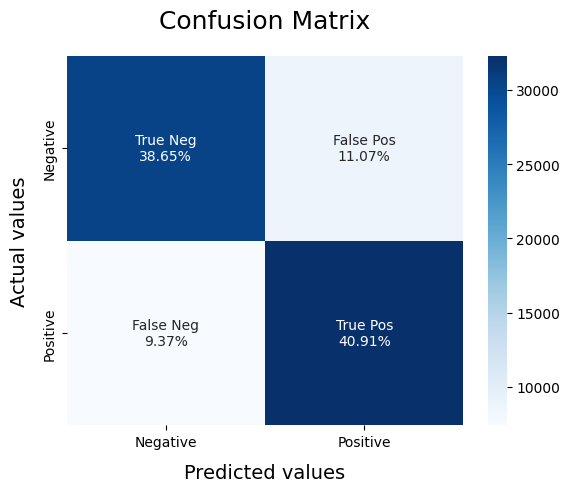

In [50]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)


In [51]:
from sklearn.model_selection import train_test_split

X_data, y_data = np.array(df['text']), np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.05, random_state = 0)
print('Data Split done.')



Data Split done.


In [52]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))



# Defining the model input length.
input_length = 60

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_length = 60000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)



X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)



embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)



Vocabulary Length: 44031


2025-03-12 10:33:28.207051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-12 10:33:28.223148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-12 10:33:28.227913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 10:33:28.240272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-12 10:33:28.998009: W tensorflow/compiler/tf2

Tokenizer vocab length: 60000
X_train.shape: (1499732, 60)
X_test.shape : (78934, 60)
Embedding Matrix Shape: (60000, 100)


In [53]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

training_model = getModel()
training_model.summary()


/opt/app-root/lib64/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1741775633.038985    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741775633.065246    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741775633.078509    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torval

Model: "Sentiment_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     6,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,000,000 (22.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,000,000 (22.89 MB)

In [54]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

I0000 00:00:1741775634.008608    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741775634.010990    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741775634.012956    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741775634.014735    1160 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [55]:


from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)



Epoch 1/12


2025-03-12 10:33:58.986821: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1741775639.149840    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.174978    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.176220    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.178566    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.179810    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.182098    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.183274    1331 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775639.185402    1331 gpu_t

1319/1319 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7526 - loss: 0.5013

W0000 00:00:1741775695.535885    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.536475    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.536972    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.537476    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.537956    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.538546    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.539062    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.539642    1327 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775695.540155    1327 gp

1319/1319 ━━━━━━━━━━━━━━━━━━━━ 64s 44ms/step - accuracy: 0.7526 - loss: 0.5013 - val_accuracy: 0.7862 - val_loss: 0.4503 - learning_rate: 0.0010
Epoch 2/12
   1/1319 ━━━━━━━━━━━━━━━━━━━━ 1:59 91ms/step - accuracy: 0.7744 - loss: 0.4838

W0000 00:00:1741775698.526162    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.527005    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.527839    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.528572    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.529540    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.530273    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.531086    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.531912    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741775698.532637    1326 gp

1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7792 - loss: 0.4601 - val_accuracy: 0.7914 - val_loss: 0.4415 - learning_rate: 0.0010
Epoch 3/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7859 - loss: 0.4499 - val_accuracy: 0.7931 - val_loss: 0.4373 - learning_rate: 0.0010
Epoch 4/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7885 - loss: 0.4449 - val_accuracy: 0.7972 - val_loss: 0.4312 - learning_rate: 0.0010
Epoch 5/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7913 - loss: 0.4409 - val_accuracy: 0.7981 - val_loss: 0.4325 - learning_rate: 0.0010
Epoch 6/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7932 - loss: 0.4379 - val_accuracy: 0.7993 - val_loss: 0.4284 - learning_rate: 0.0010
Epoch 7/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7949 - loss: 0.4343 - val_accuracy: 0.8002 - val_loss: 0.4277 - learning_rate: 0.0010
Epoch 8/12
1319/1319 ━━━━━━━━━━━━━━━━━━━━ 58s 44ms/step - accuracy: 0.7960 

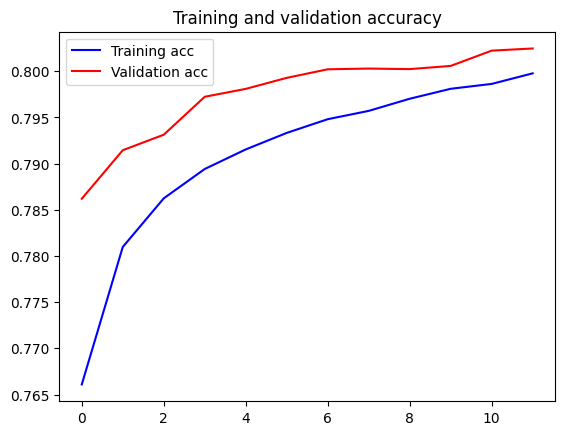

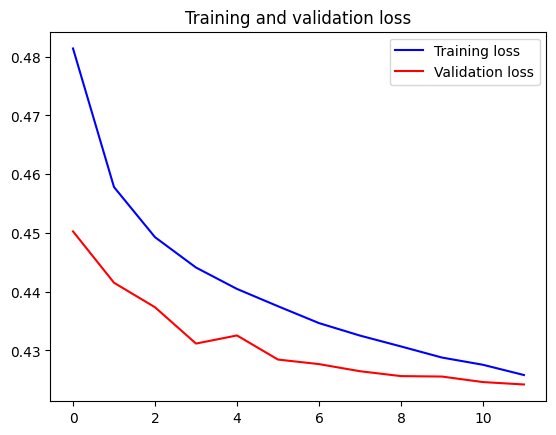

In [56]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

  40/2467 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step 

W0000 00:00:1741776337.400242    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.400759    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.401184    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.401616    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.402028    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.402464    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.402909    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.403351    1328 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776337.403787    1328 gp

2467/2467 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step


W0000 00:00:1741776347.670583    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.671090    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.671523    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.671939    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.672365    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.672826    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.673264    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.673761    1326 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1741776347.674232    1326 gp

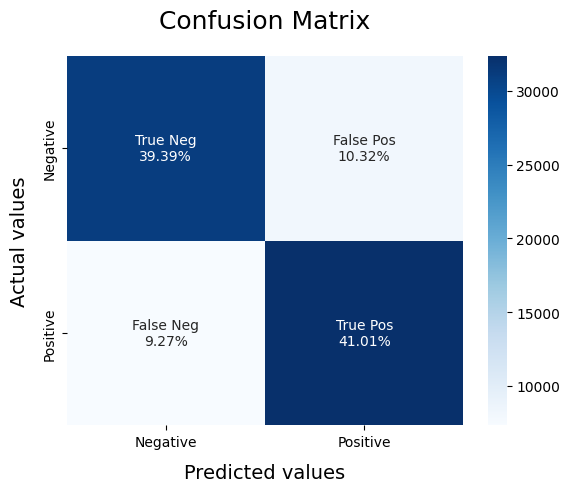

In [58]:
# Predicting on the Test dataset.
y_pred = training_model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [59]:


# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39244
           1       0.80      0.82      0.81     39690

    accuracy                           0.80     78934
   macro avg       0.80      0.80      0.80     78934
weighted avg       0.80      0.80      0.80     78934

